In [ ]:
!pip install tensorflow opencv-python matplotlib

In [ ]:
import tensorflow as tf

In [ ]:
device_list = tf.test.gpu_device_name()

In [ ]:
device_list

'/device:GPU:0'

In [ ]:
if device_list != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at : {}'.format(device_list))

Found GPU at : /device:GPU:0


In [ ]:
import tensorflow as tf
import os

remove dodgy images

In [ ]:
import cv2
import imghdr

In [ ]:
data_dir = '/content/drive/MyDrive/data3'

In [ ]:
image_exts = ['jpeg','jpg', 'png']

In [ ]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

load data

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
data = tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/data3')

Found 8707 files belonging to 2 classes.


In [ ]:
data_iterator = data.as_numpy_iterator()

In [ ]:
# get another batch test from iterator
batch = data_iterator.next()

In [ ]:
#images represented as numpy arrays
batch[0].shape

(32, 256, 256, 3)

In [ ]:
# class 1 = good condition car
# class 0 = damaged car
batch[1]

array([1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1], dtype=int32)

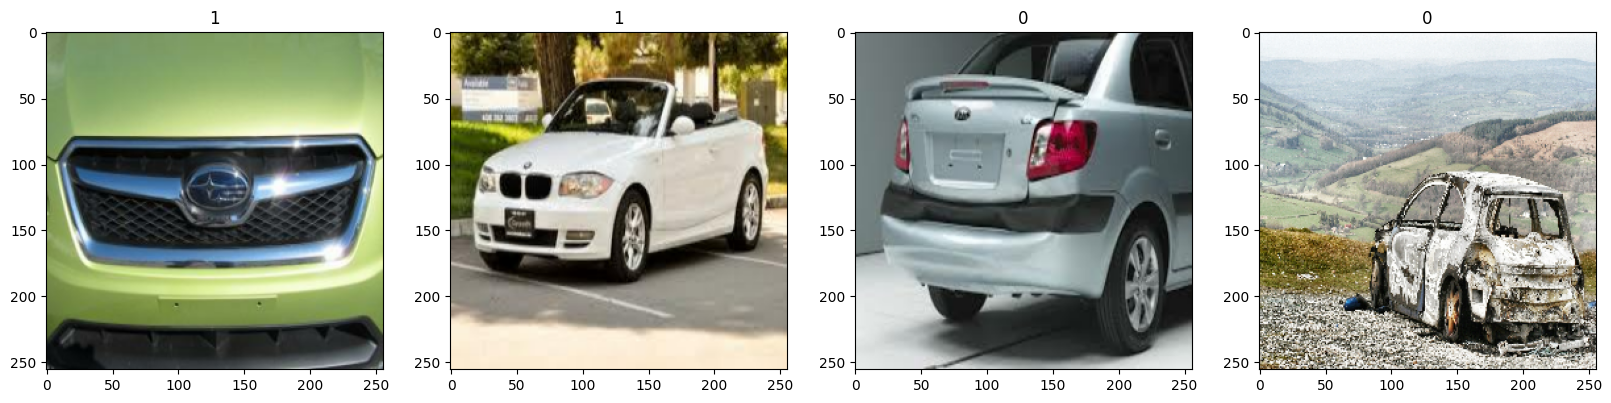

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

Scale data

In [ ]:
data = data.map(lambda x,y: (x/255, y))

In [ ]:
scaled_iterator = data.as_numpy_iterator()

In [ ]:
batch = scaled_iterator.next()

In [ ]:
batch[0].min()

0.0

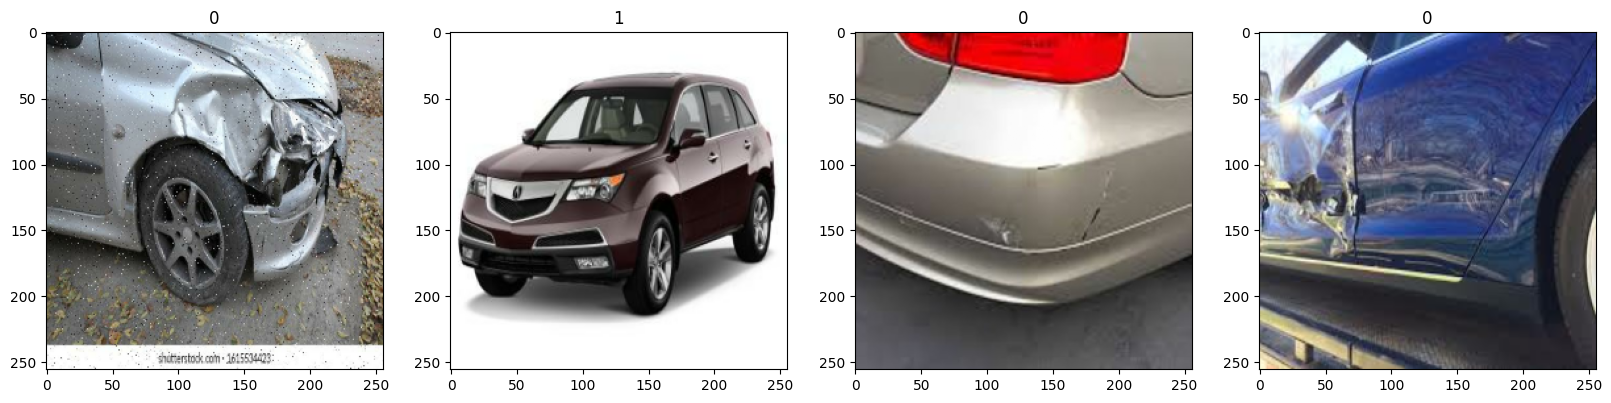

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

split data

In [ ]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [ ]:
train_size

191

In [ ]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

deep learning model

In [ ]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

train

In [ ]:
logdir='logs'

In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
hist = model.fit(train, epochs=15, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/15
191/191 [==============================] - 81s 361ms/step - loss: 0.3907 - accuracy: 0.8254 - val_loss: 0.3021 - val_accuracy: 0.8698
Epoch 2/15
191/191 [==============================] - 74s 383ms/step - loss: 0.2965 - accuracy: 0.8727 - val_loss: 0.2962 - val_accuracy: 0.8744
Epoch 3/15
191/191 [==============================] - 73s 377ms/step - loss: 0.2432 - accuracy: 0.8981 - val_loss: 0.2559 - val_accuracy: 0.8993
Epoch 4/15
191/191 [==============================] - 74s 382ms/step - loss: 0.1961 - accuracy: 0.9170 - val_loss: 0.2978 - val_accuracy: 0.8883
Epoch 5/15
191/191 [==============================] - 69s 357ms/step - loss: 0.1641 - accuracy: 0.9347 - val_loss: 0.3014 - val_accuracy: 0.8819
Epoch 6/15
191/191 [==============================] - 75s 389ms/step - loss: 0.1211 - accuracy: 0.9540 - val_loss: 0.3021 - val_accuracy: 0.8987
Epoch 7/15
191/191 [==============================] - 72s 375ms/step - loss: 0.0778 - accuracy: 0.9697 - val_loss: 0.3632 - val_ac

In [ ]:
hist.history

{'loss': [0.39071130752563477,
  0.2965497374534607,
  0.24315614998340607,
  0.19613781571388245,
  0.16411948204040527,
  0.12108493596315384,
  0.07778454571962357,
  0.06037091091275215,
  0.042992401868104935,
  0.031414248049259186,
  0.03326183184981346,
  0.02918730303645134,
  0.013675546273589134,
  0.010051337070763111,
  0.007092642597854137],
 'accuracy': [0.825425386428833,
  0.8727094531059265,
  0.8980693817138672,
  0.917048454284668,
  0.9347186088562012,
  0.9540248513221741,
  0.9697316884994507,
  0.9774214625358582,
  0.9852748513221741,
  0.989201545715332,
  0.9877290725708008,
  0.9898560047149658,
  0.9972186088562012,
  0.9970549941062927,
  0.9978730082511902],
 'val_loss': [0.30211353302001953,
  0.29622572660446167,
  0.2559491991996765,
  0.2977796494960785,
  0.30141544342041016,
  0.3021186292171478,
  0.3631519675254822,
  0.39905598759651184,
  0.42659130692481995,
  0.4877702295780182,
  0.5191263556480408,
  0.5885971784591675,
  0.6982945203781128,

plot performance

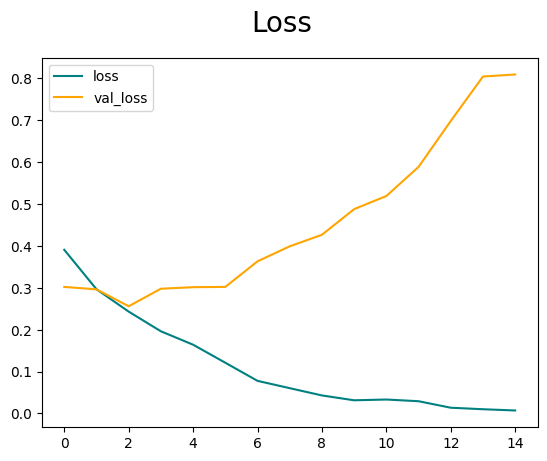

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

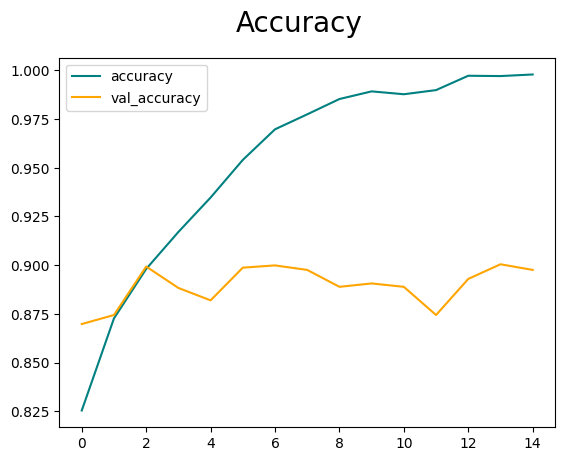

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

evaluate

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [ ]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [ ]:
len(test)

27

In [ ]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 36ms/step


In [ ]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.92783505, shape=(), dtype=float32) tf.Tensor(0.7346939, shape=(), dtype=float32) tf.Tensor(0.9085648, shape=(), dtype=float32)


testing

In [ ]:
import cv2

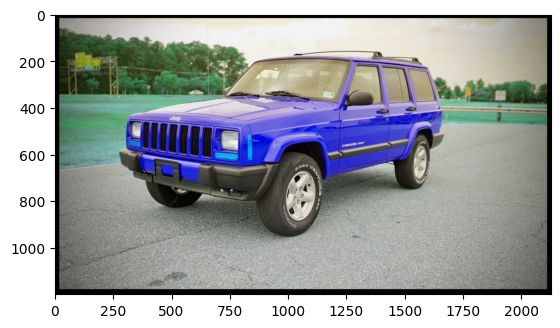

In [ ]:
img = cv2.imread('/content/sample_data/testing1.jpg')
plt.imshow(img)
plt.show()

# New Section

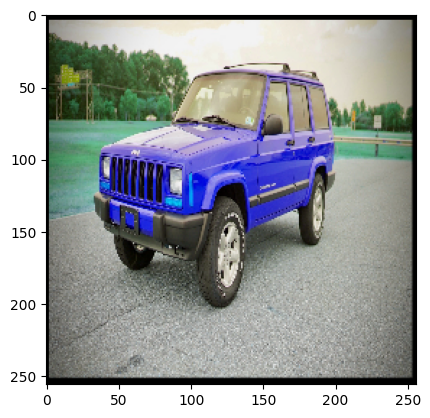

In [ ]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 188ms/step


In [ ]:
yhat

array([[5.4995728e-14]], dtype=float32)

In [ ]:
if yhat > 0.5:
    print(f'Car in good condition')
else:
    print(f'Car is damaged')

Car is damaged


saving model

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model.save(os.path.join('/content/sample_data','capstone1.h5'))

In [ ]:
new_model = load_model('/content/sample_data/capstone1.h5')

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(new_model)

In [ ]:
tflite_model = converter.convert()

In [ ]:
open('capstone.tflite', 'wb').write(tflite_model)

14790588